# Online Payment Fraud Detection - ML


## Object

- As we are approaching modernity, the trend of paying online is increasing tremendously. It is very beneficial for the buyer  to pay online as it saves time, and solves the problem of free money. Also, we do not need to carry cash with us.But we all know that Good thing are accompanied by bad things.

# Dataset description

The Dataset used for this project consists of the following columns:

- Step
- type
- amount
- nameOrig
- oldbalanceOrg
- newbalanceOrig
- nameDest
- oldbalanceDest
- newbalanceDest
- isFraud
- isFlaggedFraud



## Steps

- Importing libraries

- Read Data

- Data Preprocessing 

- Outlayer Dectection

- Feature Engineering

- Featuer encoding

- Train_Test_Split

- Model Training

- Prediction

##  Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib as jb

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

##  Read Data

In [2]:
df=pd.read_csv('E:/Rajalakshmi/PROJECT/file/train/rawtrain.csv')

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,7,CASH_OUT,413692.19,C1049202430,22680.51,0.00,C93518808,150264.00,0.00,0,0
1,6,PAYMENT,4197.94,C2051611232,20129.00,15931.06,M134963352,0.00,0.00,0,0
2,1,PAYMENT,13310.78,C2095677157,0.00,0.00,M852026681,0.00,0.00,0,0
3,2,PAYMENT,11762.79,C909914828,0.00,0.00,M116650158,0.00,0.00,0,0
4,7,PAYMENT,4736.45,C1160393458,196815.00,192078.55,M766991922,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6994,7,CASH_IN,52429.68,C1904553846,2421260.74,2473690.41,C1882860489,279027.08,226597.40,0,0
6995,7,CASH_OUT,65619.81,C1167627805,0.00,0.00,C1850042097,84362.06,61127.87,0,0
6996,5,PAYMENT,3445.14,C532068603,283795.44,280350.31,M345865414,0.00,0.00,0,0
6997,1,PAYMENT,2380.21,C535352603,6003259.91,6000879.70,M2015261478,0.00,0.00,0,0


##  Data Preprocessing 

In [4]:
# To see the information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            6999 non-null   int64  
 1   type            6999 non-null   object 
 2   amount          6999 non-null   float64
 3   nameOrig        6999 non-null   object 
 4   oldbalanceOrg   6999 non-null   float64
 5   newbalanceOrig  6999 non-null   float64
 6   nameDest        6999 non-null   object 
 7   oldbalanceDest  6999 non-null   float64
 8   newbalanceDest  6999 non-null   float64
 9   isFraud         6999 non-null   int64  
 10  isFlaggedFraud  6999 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 601.6+ KB


In [5]:
#To check if there is any null value in the dataset
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
#check shape of the entire dataframe using .shape attribute
df.shape

(6999, 11)

In [7]:
#To see the unique values in the dataset
df.nunique()

step                 7
type                 5
amount            6982
nameOrig          6999
oldbalanceOrg     5150
newbalanceOrig    4139
nameDest          4647
oldbalanceDest    2913
newbalanceDest    1243
isFraud              2
isFlaggedFraud       1
dtype: int64

In [8]:
#To check the duplicate values in the dataset
df.duplicated().sum()

0

In [9]:
# To Check the describe analysis of the data
df.describe(include="all")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6999.000000,6999,6.999000e+03,6999,6.999000e+03,6.999000e+03,6999,6.999000e+03,6.999000e+03,6999.000000,6999.0
unique,NaN,5,NaN,6999,NaN,NaN,4647,NaN,NaN,NaN,NaN
top,NaN,PAYMENT,NaN,C1049202430,NaN,NaN,C985934102,NaN,NaN,NaN,NaN
freq,NaN,3835,NaN,1,NaN,NaN,41,NaN,NaN,NaN,NaN
mean,4.191456,NaN,1.040798e+05,NaN,9.224526e+05,9.454632e+05,NaN,9.145834e+05,1.071532e+06,0.006001,0.0
std,2.479451,NaN,2.580437e+05,NaN,2.176326e+06,2.225161e+06,NaN,2.616480e+06,2.951308e+06,0.077238,0.0
min,1.000000,NaN,6.360000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.000000,NaN,4.382275e+03,NaN,1.440000e+02,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000,0.0
50%,5.000000,NaN,1.291033e+04,NaN,2.156600e+04,1.043074e+04,NaN,0.000000e+00,0.000000e+00,0.000000,0.0
75%,7.000000,NaN,1.165434e+05,NaN,1.992600e+05,1.975082e+05,NaN,2.816560e+05,2.466359e+05,0.000000,0.0


# Outliers detection

   - we have to remove this outliers in data frame. because outliers make a data leakage in model  train and  test 
     so we have  remove this outliers in data frame

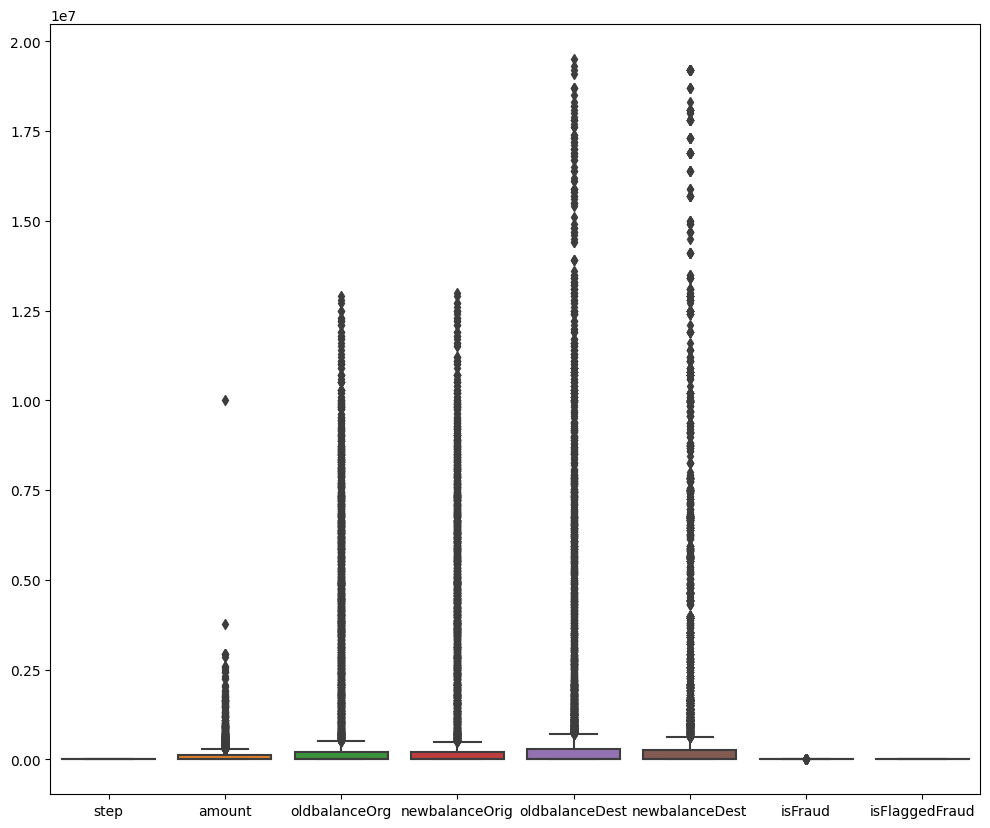

In [10]:
plt.figure(figsize=(12,10)) 
sns.boxplot(df)
plt.show()

In [11]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [12]:
#handling outlier in step
q1=df['step'].quantile(0.25)
q3=df['step'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR 

print(f"q1 = {q1}\nq3 = {q3}\nIQR = {IQR}\nlower_range = {lower_range}\nupper_range = {upper_range}")

q1 = 1.0
q3 = 7.0
IQR = 6.0
lower_range = -8.0
upper_range = 13.0


In [13]:
#capping
df['step']=np.where(df['step']<lower_range,lower_range,
                      np.where(df['step']>upper_range,upper_range,
                      df['step']))
df['step']

0       7.0
1       6.0
2       1.0
3       2.0
4       7.0
       ... 
6994    7.0
6995    7.0
6996    5.0
6997    1.0
6998    2.0
Name: step, Length: 6999, dtype: float64

In [14]:
#handling outlier in step
q1=df['amount'].quantile(0.25)
q3=df['amount'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR 

print(f"q1 = {q1}\nq3 = {q3}\nIQR = {IQR}\nlower_range = {lower_range}\nupper_range = {upper_range}")

q1 = 4382.275
q3 = 116543.39499999999
IQR = 112161.12
lower_range = -163859.405
upper_range = 228704.51499999998


In [15]:
#capping
df['amount']=np.where(df['amount']<lower_range,lower_range,
                      np.where(df['amount']>upper_range,upper_range,
                      df['amount']))
df['amount']

0       228704.515
1         4197.940
2        13310.780
3        11762.790
4         4736.450
           ...    
6994     52429.680
6995     65619.810
6996      3445.140
6997      2380.210
6998      4640.640
Name: amount, Length: 6999, dtype: float64

In [16]:
#handling outlier in step
q1=df['oldbalanceOrg'].quantile(0.25)
q3=df['oldbalanceOrg'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR 

print(f"q1 = {q1}\nq3 = {q3}\nIQR = {IQR}\nlower_range = {lower_range}\nupper_range = {upper_range}")

q1 = 144.0
q3 = 199259.96000000002
IQR = 199115.96000000002
lower_range = -298529.94000000006
upper_range = 398375.92000000004


In [17]:
#capping
df['oldbalanceOrg']=np.where(df['oldbalanceOrg']<lower_range,lower_range,
                      np.where(df['oldbalanceOrg']>upper_range,upper_range,
                      df['oldbalanceOrg']))
df['oldbalanceOrg']

0        22680.51
1        20129.00
2            0.00
3            0.00
4       196815.00
          ...    
6994    398375.92
6995         0.00
6996    283795.44
6997    398375.92
6998      1023.00
Name: oldbalanceOrg, Length: 6999, dtype: float64

In [18]:
#handling outlier in step
q1=df['newbalanceOrig'].quantile(0.25)
q3=df['newbalanceOrig'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR 

print(f"q1 = {q1}\nq3 = {q3}\nIQR = {IQR}\nlower_range = {lower_range}\nupper_range = {upper_range}")

q1 = 0.0
q3 = 197508.19
IQR = 197508.19
lower_range = -296262.28500000003
upper_range = 395016.38


In [19]:
#capping
df['newbalanceOrig']=np.where(df['newbalanceOrig']<lower_range,lower_range,
                      np.where(df['newbalanceOrig']>upper_range,upper_range,
                      df['newbalanceOrig']))
df['newbalanceOrig']

0            0.00
1        15931.06
2            0.00
3            0.00
4       192078.55
          ...    
6994    395016.38
6995         0.00
6996    280350.31
6997    395016.38
6998         0.00
Name: newbalanceOrig, Length: 6999, dtype: float64

In [20]:
#handling outlier in step
q1=df['oldbalanceDest'].quantile(0.25)
q3=df['oldbalanceDest'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR 

print(f"q1 = {q1}\nq3 = {q3}\nIQR = {IQR}\nlower_range = {lower_range}\nupper_range = {upper_range}")

q1 = 0.0
q3 = 281656.015
IQR = 281656.015
lower_range = -422484.0225
upper_range = 563312.03


In [21]:
#capping
df['oldbalanceDest']=np.where(df['oldbalanceDest']<lower_range,lower_range,
                      np.where(df['oldbalanceDest']>upper_range,upper_range,
                      df['oldbalanceDest']))
df['oldbalanceDest']

0       150264.00
1            0.00
2            0.00
3            0.00
4            0.00
          ...    
6994    279027.08
6995     84362.06
6996         0.00
6997         0.00
6998         0.00
Name: oldbalanceDest, Length: 6999, dtype: float64

In [22]:
#handling outlier in step
q1=df['newbalanceDest'].quantile(0.25)
q3=df['newbalanceDest'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR 

print(f"q1 = {q1}\nq3 = {q3}\nIQR = {IQR}\nlower_range = {lower_range}\nupper_range = {upper_range}")

q1 = 0.0
q3 = 246635.85
IQR = 246635.85
lower_range = -369953.775
upper_range = 493271.7


In [23]:
#capping
df['newbalanceDest']=np.where(df['newbalanceDest']<lower_range,lower_range,
                      np.where(df['newbalanceDest']>upper_range,upper_range,
                      df['newbalanceDest']))
df['newbalanceDest']

0            0.00
1            0.00
2            0.00
3            0.00
4            0.00
          ...    
6994    226597.40
6995     61127.87
6996         0.00
6997         0.00
6998         0.00
Name: newbalanceDest, Length: 6999, dtype: float64

In [24]:
#handling outlier in step
q1=df['isFraud'].quantile(0.25)
q3=df['isFraud'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR 

print(f"q1 = {q1}\nq3 = {q3}\nIQR = {IQR}\nlower_range = {lower_range}\nupper_range = {upper_range}")

q1 = 0.0
q3 = 0.0
IQR = 0.0
lower_range = 0.0
upper_range = 0.0


In [25]:
#capping
df['isFraud']=np.where(df['isFraud']<lower_range,lower_range,
                      np.where(df['isFraud']>upper_range,upper_range,
                      df['isFraud']))
df['isFraud']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6994    0.0
6995    0.0
6996    0.0
6997    0.0
6998    0.0
Name: isFraud, Length: 6999, dtype: float64

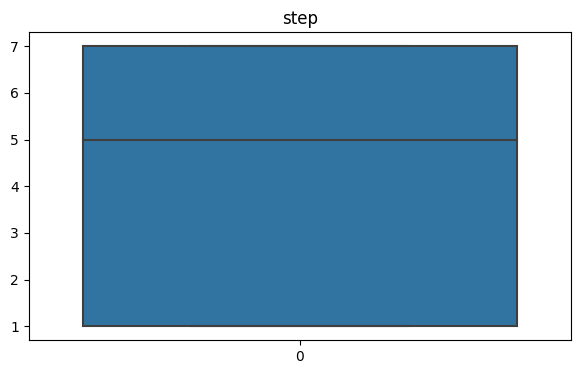

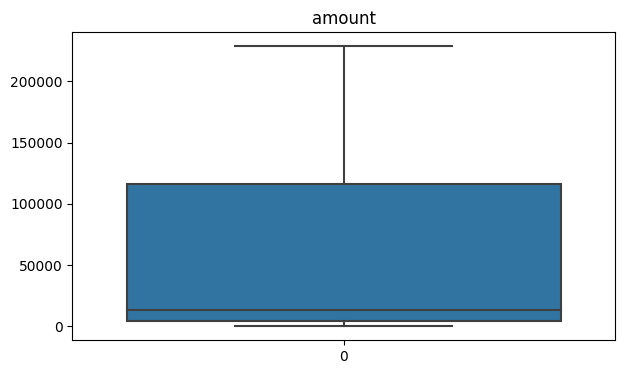

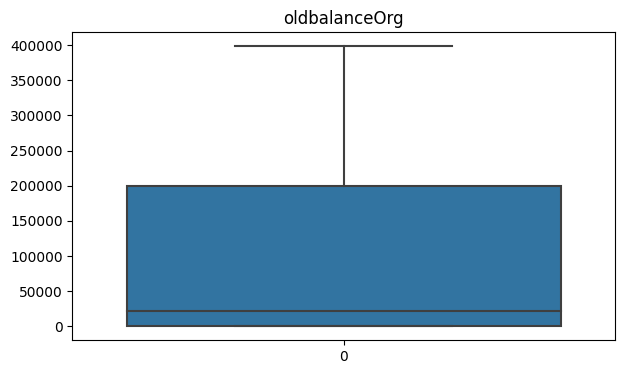

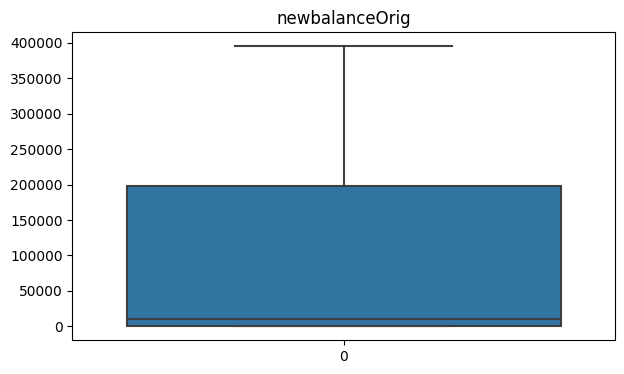

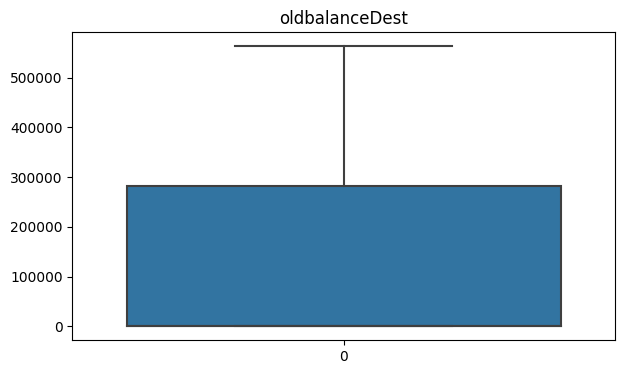

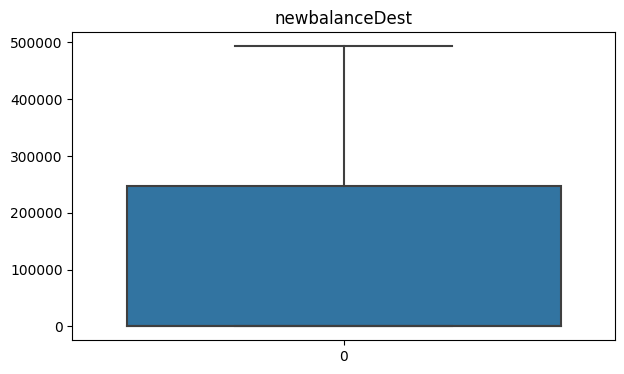

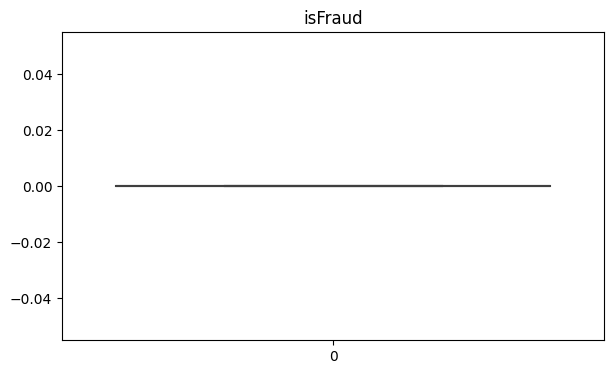

In [26]:
#Using box plot for finding outliers

plt.figure(figsize=(7,4))
sns.boxplot(df['step'])
plt.title('step')

plt.figure(figsize=(7,4))
sns.boxplot(df['amount'])
plt.title('amount')


plt.figure(figsize=(7,4))
sns.boxplot(df['oldbalanceOrg'])
plt.title('oldbalanceOrg')

plt.figure(figsize=(7,4))
sns.boxplot(df['newbalanceOrig'])
plt.title('newbalanceOrig')


plt.figure(figsize=(7,4))
sns.boxplot(df['oldbalanceDest'])
plt.title('oldbalanceDest')

plt.figure(figsize=(7,4))
sns.boxplot(df['newbalanceDest'])
plt.title('newbalanceDest')

plt.figure(figsize=(7,4))
sns.boxplot(df['isFraud'])
plt.title('isFraud')



plt.show()

##  Feature Engineering

   |Feature Engineering is the process of extracting and organizing the important feature from raw data 
      in such a way that if fits the purpose of the machine learning model.|

In [27]:
# Target and Labels
df.copy()
X =df.drop(['isFraud','isFlaggedFraud'],axis=1).copy()
Y =df['isFraud'].copy()



In [28]:
X

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,7.0,CASH_OUT,228704.515,C1049202430,22680.51,0.00,C93518808,150264.00,0.00
1,6.0,PAYMENT,4197.940,C2051611232,20129.00,15931.06,M134963352,0.00,0.00
2,1.0,PAYMENT,13310.780,C2095677157,0.00,0.00,M852026681,0.00,0.00
3,2.0,PAYMENT,11762.790,C909914828,0.00,0.00,M116650158,0.00,0.00
4,7.0,PAYMENT,4736.450,C1160393458,196815.00,192078.55,M766991922,0.00,0.00
...,...,...,...,...,...,...,...,...,...
6994,7.0,CASH_IN,52429.680,C1904553846,398375.92,395016.38,C1882860489,279027.08,226597.40
6995,7.0,CASH_OUT,65619.810,C1167627805,0.00,0.00,C1850042097,84362.06,61127.87
6996,5.0,PAYMENT,3445.140,C532068603,283795.44,280350.31,M345865414,0.00,0.00
6997,1.0,PAYMENT,2380.210,C535352603,398375.92,395016.38,M2015261478,0.00,0.00


In [29]:
Y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6994    0.0
6995    0.0
6996    0.0
6997    0.0
6998    0.0
Name: isFraud, Length: 6999, dtype: float64

    - *The above method seperates the features and labels from the data. The label variable are copied into y
      and the remaining features are copied into x.*

# Feature Encoding

  - Feature encoding is the process of transforming the categoriacl datas into numercial data. By transforming 
    the data our machine learning model can understand the data

In [30]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [31]:
# Encoding feature
encoder =OrdinalEncoder()
X_encode=encoder.fit(X)
import joblib as jb
jb.dump(X_encode,'file/train/model/train_encode_model.pkl')
X_encode=encoder.transform(X)
X=pd.DataFrame(X_encode, columns=X.columns)

In [32]:
X

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,6.0,1.0,6025.0,165.0,1762.0,0.0,785.0,902.0,0.0
1,5.0,3.0,1682.0,3863.0,1547.0,912.0,1467.0,0.0,0.0
2,0.0,3.0,3533.0,4029.0,0.0,0.0,4366.0,0.0,0.0
3,1.0,3.0,3364.0,6685.0,0.0,0.0,1133.0,0.0,0.0
4,6.0,3.0,1855.0,515.0,3427.0,2420.0,4205.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6994,6.0,0.0,4609.0,3315.0,3708.0,2693.0,383.0,1269.0,704.0
6995,6.0,1.0,4746.0,551.0,0.0,0.0,367.0,620.0,406.0
6996,4.0,3.0,1414.0,5305.0,3600.0,2583.0,3365.0,0.0,0.0
6997,0.0,3.0,984.0,5315.0,3708.0,2693.0,2825.0,0.0,0.0


In [33]:
X.to_csv('file/train/Processed/encoded_processed.csv',index=False)

# Splitting train and test datas

In [34]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, train_size=0.7, shuffle=True, random_state=123)

 - This splits the data into test and train using train_test_split function. The x and y variables are seperated into
   x_train,x_test,y_train and y_test at a train_size of 0.7(ie, 70% of the data). The shuffle=True function randomly shuffles 
   the data with a random state of 123

In [35]:
# save train and test data
X_train.to_csv('file/train/raw/X_train.csv',index=False)
Y_train.to_csv('file/train/raw/Y_train.csv',index=False)

X_test.to_csv('file/evaluate/raw/X_test.csv',index=False)
Y_test.to_csv('file/evaluate/raw/Y_test.csv',index=False)

# Model Training






- **Model training is a process in which a machine learning algorithm is fed with training data from which it can learn.**

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
reg =RandomForestRegressor()
reg.fit(X_train,Y_train)
print('Train score:',reg.score(X_train,Y_train)* 100)

Train score: 100.0


In [38]:
import joblib as jb
jb.dump(reg,'file/train/model/reg.pkl')    

['file/train/model/reg.pkl']

# Prediction

In [39]:
model=jb.load('file/train/model/reg.pkl')



In [40]:
model

RandomForestRegressor()

In [41]:
y_pred=pd.DataFrame(model.predict(X_test))
y_pred

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
2095,0.0
2096,0.0
2097,0.0
2098,0.0


In [42]:
from math import sqrt
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [43]:
print('Mean Absolute Error:',mean_absolute_error(y_pred,Y_test))
print('Mean Squared Error :',mean_squared_error(y_pred,Y_test))
print('Root Mean Squared Error :',sqrt(mean_squared_error(y_pred,Y_test)))

Mean Absolute Error: 0.0
Mean Squared Error : 0.0
Root Mean Squared Error : 0.0


<Axes: ylabel='Frequency'>

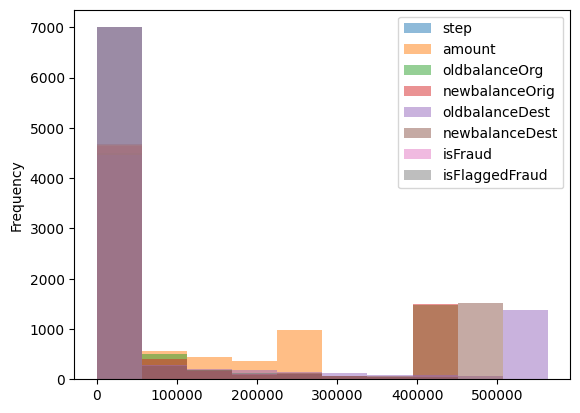

In [44]:
df.plot.hist(alpha=0.5)